# Comparison of Numerical and Analytic 
This notebook uses data from the script `problem_b.py`. This data is (for the time being) in the folder "data".

In [13]:
# Getting out the toolbox
from matplotlib import pyplot as plt
import pickle
import seaborn as sns
import numpy as np

from IPython.core.pylabtools import figsize

In [14]:
# Seaborn
sns.set(color_codes=True)
figsize(24, 18)

In [15]:
# Importing data - this is not all, there is also cpu time
energies_analytic  = pickle.load(open("../data/energies_analytic.p", "rb"))
energies_numerical = pickle.load(open("../data/energies_numerical.p", "rb"))

So what do I have here? The structures are three-dimensional,
- First axis: no of partices, 1, 10, 100, 500
- Second axis: no of dimensions: 1, 2, 3
- Third axis: $\alpha$ value

In [16]:
num_particles = [1, 10, 100] #, 500]
dimensions = [1, 2, 3]
alpha = np.linspace(0.3, 0.7, 11)

In [25]:
print(alpha)

[ 0.3   0.34  0.38  0.42  0.46  0.5   0.54  0.58  0.62  0.66  0.7 ]


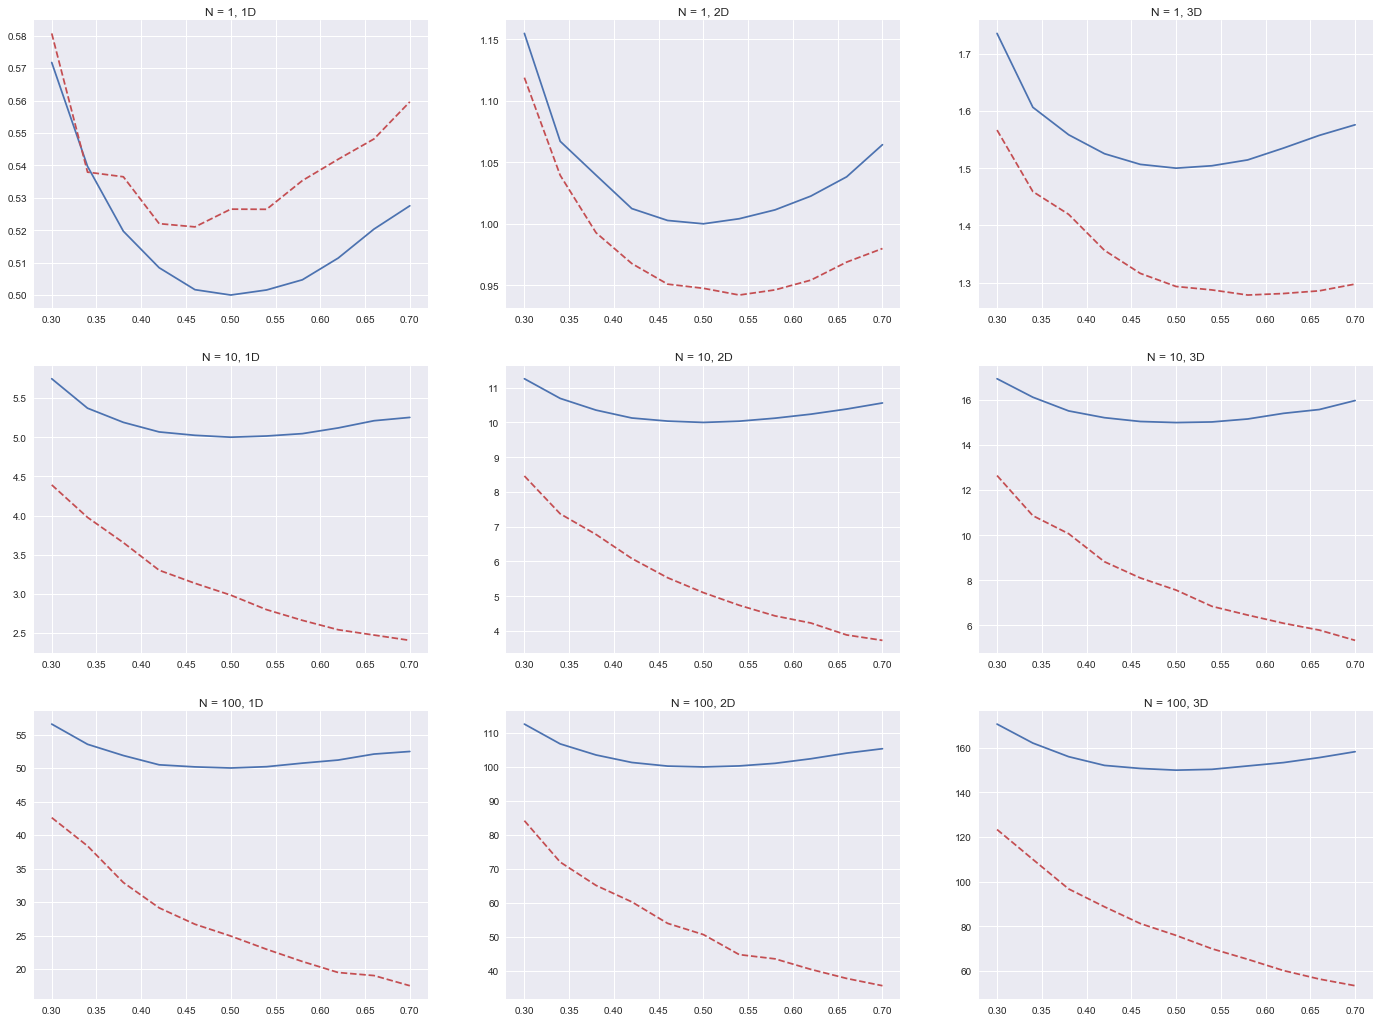

In [18]:
plot_no = 0
for i in range(len(num_particles)):
    for j in range(len(dimensions)):
        plot_no += 1
        plt.subplot(len(num_particles), len(dimensions), plot_no)
        plt.title("N = {}, {}D".format(num_particles[i], dimensions[j]))
        plt.plot(alpha, energies_analytic[i, j, :], '-b')
        plt.plot(alpha, energies_numerical[i, j, :], '--r')
        plt.plot()
        
plt.show()

## Conlusion (so far)
This all turned out horribly bad. But let's look at the bright side: at lease we have some kind of framework to get the plots from data. Bear in mind: $N = 500$ was not allowed to finish.

## How Long did it take??

In [8]:
cpu_time_analytic  = pickle.load(open("../data/cpu_time_analytic.p", "rb"))
cpu_time_numerical = pickle.load(open("../data/cpu_time_numerical.p", "rb"))

In [9]:
for i in range(len(num_particles)):
    for j in range(len(dimensions)):
        print("N = {:4}, {:2}D".format(num_particles[i], dimensions[j]))
        print("Analytic  CPU time: {:9.5f} seconds"  .format(np.mean(cpu_time_analytic[i, j, :])))
        print("Numerical CPU time: {:9.5f} seconds\n".format(np.mean(cpu_time_numerical[i, j, :])))

N =    1,  1D
Analytic  CPU time:   0.40074 seconds
Numerical CPU time:   0.49187 seconds

N =    1,  2D
Analytic  CPU time:   0.39498 seconds
Numerical CPU time:   0.56769 seconds

N =    1,  3D
Analytic  CPU time:   0.43312 seconds
Numerical CPU time:   0.68580 seconds

N =   10,  1D
Analytic  CPU time:   0.55789 seconds
Numerical CPU time:   1.87667 seconds

N =   10,  2D
Analytic  CPU time:   0.67532 seconds
Numerical CPU time:   4.04714 seconds

N =   10,  3D
Analytic  CPU time:   0.78314 seconds
Numerical CPU time:   6.84975 seconds

N =  100,  1D
Analytic  CPU time:   1.90686 seconds
Numerical CPU time:  69.83219 seconds

N =  100,  2D
Analytic  CPU time:   3.53432 seconds
Numerical CPU time: 261.42762 seconds

N =  100,  3D
Analytic  CPU time:   4.46291 seconds
Numerical CPU time: 824.80493 seconds



## The variance?

In [10]:
variance_analytic  = pickle.load(open("../data/variance_analytic.p", "rb"))
variance_numerical = pickle.load(open("../data/variance_numerical.p", "rb"))

In [12]:
for i in range(len(num_particles)):
    for j in range(len(dimensions)):
        print("N = {:4}, {:2}D".format(num_particles[i], dimensions[j]))
        print("Analytic  Variance: {:9.5f}"  .format(variance_analytic[i, j, 5]))
        print("Numerical Variance: {:9.5f}\n".format(variance_numerical[i, j, 5]))

N =    1,  1D
Analytic  Variance:   0.00000
Numerical Variance:   0.04117

N =    1,  2D
Analytic  Variance:   0.00000
Numerical Variance:   0.07391

N =    1,  3D
Analytic  Variance:   0.00000
Numerical Variance:   0.10792

N =   10,  1D
Analytic  Variance:   0.00000
Numerical Variance:   0.69772

N =   10,  2D
Analytic  Variance:   0.00000
Numerical Variance:   2.12673

N =   10,  3D
Analytic  Variance:   0.00000
Numerical Variance:   3.74973

N =  100,  1D
Analytic  Variance:   0.00000
Numerical Variance:  11.76871

N =  100,  2D
Analytic  Variance:   0.00000
Numerical Variance:  31.24952

N =  100,  3D
Analytic  Variance:   0.00000
Numerical Variance:  34.03846



In [26]:
print("Analytic energies")
print(energies_analytic[0, 0, :])
print("variance")
print(variance_analytic[0, 0, :])
print("Numerical energies")
print(energies_numerical[0, 0, :])
print("variance")
print(variance_numerical[0, 0, :])

Analytic energies
[ 0.57173027  0.53969525  0.51968514  0.50842212  0.50164762  0.5
  0.50155914  0.50469876  0.51139956  0.52034001  0.52752418]
variance
[ 0.15040461  0.08152543  0.03900318  0.01535424  0.00345465  0.
  0.00297998  0.01171784  0.02387791  0.0381368   0.05900574]
Numerical energies
[ 0.58070544  0.53791     0.53647678  0.5220164   0.52101986  0.52649075
  0.52644043  0.53530115  0.54188367  0.54814527  0.55959545]
variance
[ 0.25351763  0.12801473  0.1120271   0.06712346  0.05250078  0.04116838
  0.02632675  0.02589669  0.02213333  0.01938572  0.02044341]
